# Interactive Session: Intro to Xarray 🛰️🌍

![ntl](./assets/ntl.jpg)

Data science for sustainability is a ***broad*** topic. But generally, to figure out how we might create a more sustainabile future, we need two types of data: human and environment. These types of data are inharently geospatial because they **map** human and environment phenomena on planet earth. 

[<span class="codeb">Geographic Information Systems</span>](https://en.wikipedia.org/wiki/Geographic_information_system) (GIS) allow for visualizing, manipulating, and analyzing human and environmental geographic data. But GIS platforms have limited utility because (1) it can be difficult to reproduce work flows with a GIS and (2) processing large volumes of data inefficent with a GIS graphical user interface (GUI). Further, GIS platforms tend to be a black box that do not allow you to fully understand how your data is being processed. 

Thankfully, open-source data science evangelists have developed a suite of geospatial data science packages – such as [<span class="codeb">GeoPandas</span>](https://geopandas.org) and [<span class="codeb">Rasterio</span>](https://rasterio.readthedocs.io) – in Python that build upon [Numpy](https://numpy.org), [<span class="codeb">Pandas</span>](https://pandas.pydata.org), and other commonly used Python packages. As such, many of the data structures and functions are similar for packages like <span class="code">Geopandas</span> as they are in Pandas. 

In this session, we will overview how GeoSpatial data can be analysized in Python. Those of you who have a background in GIS will notice many parallels with ArcGIS and QGIS. The advantage here, is you will have budding cababilities to build your own GIS, but with Python. 
 
<p style="height:1pt"> </p>

<div class="boxhead2">
    Session Topics
</div>

<div class="boxtext2">
<ul class="a">
    <li> 📌 Introduction to <span class="codeb">Rasterio</span> </li>
    <ul class="b">
        <li> Reading raster files </li>
        <li> Raster meta data </li>
        <li> Rasters as 2-d arrays </li>   
        <li> Rasters math </li>   
</ul>
</div>

<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

### Instructions
We will work through this notebook together. To run a cell, click on the cell and press "Shift" + "Enter" or click the "Run" button in the toolbar at the top. 

<p style="color:#408000; font-weight: bold"> 🐍 &nbsp; &nbsp; This symbol designates an important note about Python structure, syntax, or another quirk.  </p>

<p style="color:#008C96; font-weight: bold"> ▶️ &nbsp; &nbsp; This symbol designates a cell with code to be run.  </p>

<p style="color:#008C96; font-weight: bold"> ✏️ &nbsp; &nbsp; This symbol designates a partially coded cell with an example.  </p>

<hr style="border-top: 1px solid gray; margin-top: 24px; margin-bottom: 1px"></hr>

### Coordinate reference systems (CRS) and spatial Projections
<hr style="border-top: 0.2px solid gray; margin-top: 12px; margin-bottom: 1px"></hr>

The Earth is a three dimensional spheroid, but maps genearlly two dimensional representations of phenomena on the Earth. As such, cartographers have devevloped many methods to project 3-D data onto a 2-D surface. To map points, lines, and polygons from 3-D to 2-D, projections have a coordinate reference system (CRS) that provides information on the units and type of geographic transform performed on the data to map it. 

<img src="./assets/crs.jpg" alt="crs" width="500"/>

A full overview of geographic projections and coordinate reference systesms is out of scope for this course. But I suggest you [reading up on them](https://pro.arcgis.com/en/pro-app/3.1/help/mapping/properties/coordinate-systems-and-projections.htm) if you are unfamiliary with these terms. 

For this class, what you need to know is: 

1. Always check the `crs` of your data and to make sure that two or more datasets are in the same `crs` and `projection` before you perform analysis. This will be come clearer in future labs. 

2. Know that **reprojecting** data will fundmentally alter your data. This is okay. But it will add spatial uncertainty to analysis. More on this later.

<hr style="border-top: 0.2px solid gray; margin-top: 12pt; margin-bottom: 0pt"></hr>

## Introduction to Rasterio

<img src="./assets/rasterio.png">

[Rasterio](https://rasterio.readthedocs.io/en/stable/#) is an open-source Python library that enables the use and maniplation of raster data. Most often used for remote-sensed or weather/climate data, raster data is a spatial grid in which each cell is ascribe a numeric or float point value. Often, raster values actually mean something physical (e.g. a global map of daily maximum temperature may be in °C). But they also can be used to classify grid cells (e.g. a value of 0, means ocean and a value of 1 means land). 

<img src="./assets/raster-vector.png" alt="rastervector" width="500"/>

As shown above, `Vector` data can be transformed into `raster` data, and vice versa. Like vector data, `raster` data must have spatial metadata that explains the geographic extent, crs, and projection, as well as things like `nan` values 

### Loading a Raster

Let's take a look at a `raster` dataset. This file contains an estimated daily maximum air temperature values from [CHIRTS-daily](https://www.chc.ucsb.edu/data/chirtsdaily), a dataset I helped build during my PhD. CHIRTS-daily leverages the temporal accuracy of weather stations with the spatial coverage of weather satellites to produce a continuous ~5km grid of daily maximum temperatures from 1983-2016. This is really important, because much of the planet does not have weather station data. In fact, about 4 billion people live more than 25 km from a weather station (see our paper in [Environmental Research Letters](https://iopscience.iop.org/article/10.1088/1748-9326/ac30c0/pdf).

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [29]:
import rasterio 
import os
import matplotlib.pyplot as plt
import numpy as np

fn = os.path.join('../data/Tmax.2016.07.01.tif')
rst1 = rasterio.open(fn)
print(type(rst1))

<class 'rasterio.io.DatasetReader'>


The `rasterio` object is a `rasterio.io.DatasetReader` and has several attributes/methods that allow you to understand the dataset and access the data. But it is is not as straightforward as `GeoPandas DataFrames`. The `meta` attribute is the most useful. 

**QUESTION: What information does the meta give you?**

In [3]:
rst1.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

Notice that the `meta` attribute is a Python `dictionary`, which means it can easily be accessed by `keys`. It can also be easily updated. 

In [4]:
print(rst1.meta['dtype'])

float32


### Read and Write the data
Raster files (usually `GeoTiff`) often contain multiple `bands` or stacked arrays. In this case our raster only has one band. We can access it with the code below. Notice that the `band` is a 2-d numpy object with a shape of 2600 rows by 7200 columns.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [5]:
rst1.read(1)

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

In [6]:
print(type(rst1.read(1)))
print(rst1.read(1).shape)

<class 'numpy.ndarray'>
(2600, 7200)


Let's plot it!

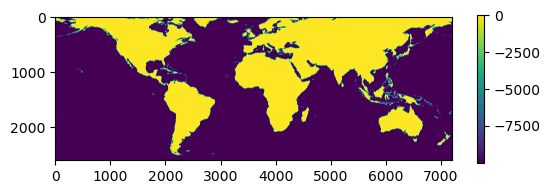

In [11]:
plt.imshow(rst1.read(1));
plt.colorbar(shrink = 0.4);

What's wrong with the image? Well it looks like the ocean values must be very small. Let's look at the meta data again and the array.

In [12]:
rst1.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

In [13]:
rst1.read(1)

array([[-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       ...,
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.],
       [-9999., -9999., -9999., ..., -9999., -9999., -9999.]],
      dtype=float32)

The ocean values look like they are -9999, so let's update the `meta` data and write a new `GeoTiff` file so we know to ignore the ocean values.

In [14]:
# File Name
fn = os.path.join('../data/Tmax.2016.07.01_update.tif')

# Get the data array 
arr = rst1.read(1)

# Update the meta data
meta_out = rst1.meta
meta_out['nodata'] = -9999.
meta_out

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

In [15]:
# Write the file
with rasterio.open(fn, "w", **meta_out) as dest:
    dest.write(arr, 1)

### Explore the new data 
Let's read the new data with the correct meta data values and plot it. Notice that the meta data is now correct, but the ocean is still funny. This is because `plt.imshow` is only being passed the `numpy array` object, not the meta data. So you will have to manual set the `vmin` and `vmax` parameteres.

In [16]:
fn = os.path.join('../data/Tmax.2016.07.01_update.tif')
rst1 = rasterio.open(fn)
rst1.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -9999.0,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

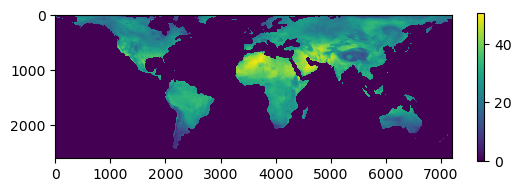

In [17]:
# -100 C seems like a solid low bound for air temperature data
plt.imshow(rst1.read(1), vmin = 0)
plt.colorbar(shrink = 0.4)

### We can also look at the distribution of the data
<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [18]:
# copy the array
arr = rst1.read(1)
print(arr.shape)

# flatten it
arr_f = arr.flatten()
print(arr_f.shape)

(2600, 7200)
(18720000,)


In [19]:
# Drop the ocean values
arr_f = arr_f[arr_f != -9999.]
print(arr_f.shape)

(5741925,)


Text(0.5, 1.0, 'Global Distribution of 2m Air Temperatures July 1 2016')

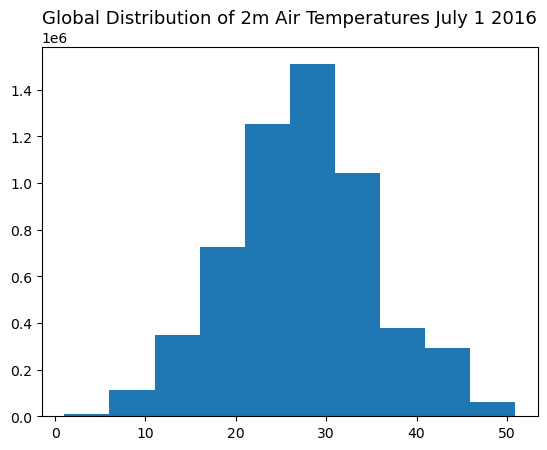

In [20]:
# Plot the histogram
plt.hist(arr_f);
plt.title('Global Distribution of 2m Air Temperatures July 1 2016', fontsize = 13)

### Raster Math
Because `raster` data are read by Python as 2-D `numpy arrays`, it is easy to preform mathmatical oppertations on them. The arrays must be the same size. In other words the rasters must align, the underlying raster files must have the same projection, .crs, spatial resolution, and spatial extent. 

We are going to use a climate projection I helped develop, the [CHC-CMIP6 dataset](https://www.chc.ucsb.edu/data/chc-cmip6). This is the highest resolution global climate projection for 2030 and 2050 produced to date. It is a very unique climate projection and if you have questions, I am happy to chat with you about it because it pretty different from other climate projections. Our hope in producing CHC-CMIP6, is literally to save lives by helping governments prepare for a much hotter future.

The datset we are using here uses the SSP-RCP 245 projection for 2050. [Carbon Brief](https://www.carbonbrief.org/explainer-how-shared-socioeconomic-pathways-explore-future-climate-change/) has a great data explainer to understand the basics of CMIP6 projection models. I suggest giving it a read.

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [21]:
# File name
fn = os.path.join('../data/2050_SSP245.Tmax.2016.07.01.tif')

In [22]:
# Open
rst2 = rasterio.open(fn)

In [23]:
# Check meta data
rst2.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 7200,
 'height': 2600,
 'count': 1,
 'crs': CRS.from_epsg(4326),
 'transform': Affine(0.05000000074505806, 0.0, -180.0,
        0.0, -0.05000000074505806, 70.0)}

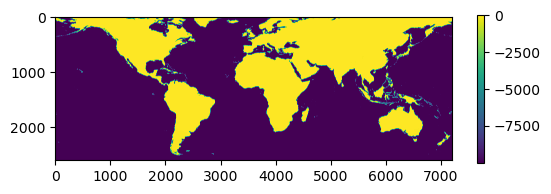

In [24]:
# Plot it
plt.imshow(rst2.read(1));
plt.colorbar(shrink = 0.4)

#### How much will the planet warm by 2050?

Keep in mind he ocean is still a problem with the `2050_SSP245` file, but we do not need to rewrite the file per say. As long as we know the issue, we can make sense of our data.

To figure out how much warming July 1, 2016 would be under an SSP245 projection in 2050, we simply subtract the two datasets.

**QUESTION: About how much hotter is July 1 in 2050 than 2016?**

<div class="run">
    ▶️ <b> Run the cells below. </b>
</div>

In [25]:
# Pull the arrays from the rasterio reader
arr_1 = rst1.read(1)
arr_2 = rst2.read(1)

# Do the math
arr_3 = arr_2 - arr_1

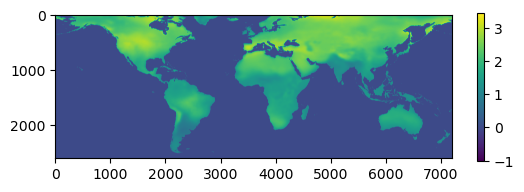

In [26]:
# Plot it, but let's mask out the ocean values but setting a low bound of -1 °C
plt.imshow(arr_3, vmin = -1);
plt.colorbar(shrink = 0.4);

In [27]:
# What is the maximum change in air temperatures?
arr_3[arr_3 != -9999].max()

3.4606762

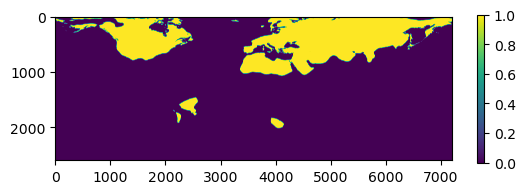

In [30]:
# Which areas of the planet will be > 2°C warmer on July 1?
data = np.where(arr_3 > 2, 1, 0)
plt.imshow(data)
plt.colorbar(shrink = 0.4);

### How much will the distribution of temperatures shift on July 1?

Text(0.5, 1.0, 'Global Distribution of 2m Air Temperatures July 1 2016 vs. July 1 2050 for SSP 245')

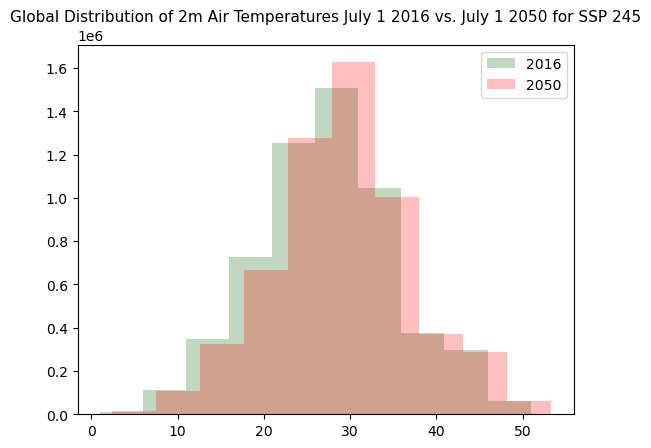

In [31]:
# Data for 2016
data = arr_1 = arr_1[arr_1 != -9999.]
plt.hist(arr_1, color = 'darkgreen', alpha = 0.25);

# Data for 2050
data = arr_2 = arr_2[arr_2 != -9999.]
plt.hist(arr_2, color = 'red', alpha = 0.25);

# Legend
plt.legend(labels = ['2016', '2050'])

plt.title('Global Distribution of 2m Air Temperatures July 1 2016 vs. July 1 2050 for SSP 245', fontsize = 11)

# Concluding Points

<img src="./assets/tay.jpg" alt="tay" width="500"/>

**Congratulations!** You now are on your way to truly doing Data Science for Sustainability. You know more about geospatial analysis than most humans on the planet. There is still tons left to learn and the best way to learn more is to practice. This notebook gives you a solid foundation to embark on your own work.